# **Regressão Linear Múltipla**

In [1]:
import numpy as np
import pandas as pd

In [2]:
enem = pd.read_csv('enem_2019_tratado.csv', sep=',', encoding='iso-8859-1')

## Análise inicial

**Queremos criar um modelo matemático de regressão linear múltipla para prever a nota de redação tendo como variáveis independentes as notas de seus componentes.**

In [3]:
enem.head(10)

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim
5,"1,90E+11",São José do Rio Preto,18,F,1,branca,1,2,pública,35028927.0,...,612.8,Espanhol,1.0,120.0,160.0,120.0,80.0,100.0,580.0,Não
6,"1,90E+11",Franca,32,M,1,parda,1,1,não_respondeu,NaN,...,584.1,Espanhol,1.0,120.0,120.0,120.0,120.0,100.0,580.0,Sim
7,"1,90E+11",Santo André,20,F,1,parda,1,1,não_respondeu,NaN,...,508.5,Espanhol,1.0,120.0,120.0,120.0,100.0,80.0,540.0,Sim
8,"1,90E+11",São Paulo,26,M,1,branca,1,1,não_respondeu,NaN,...,681.2,Espanhol,1.0,180.0,200.0,200.0,200.0,120.0,900.0,Sim
9,"1,90E+11",Santo André,44,F,2,parda,1,1,não_respondeu,NaN,...,488.1,Espanhol,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim


In [4]:
enem.columns

Index(['NU_INSCRICAO', 'NO_MUNICIPIO_RESIDENCIA', 'IDADE', 'SEXO',
       'TP_ESTADO_CIVIL', 'RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'ESCOLA', 'CO_ESCOLA', 'NO_MUNICIPIO_ESC', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NOTA_CN',
       'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'COMP1', 'COMP2', 'COMP3', 'COMP4', 'COMP5', 'NOTA_REDACAO',
       'INTERNET'],
      dtype='object')

In [5]:
enem.shape

(499940, 28)

**Selecionando apenas um dos colégios**

In [8]:
colegiox = enem.loc[enem.CO_ESCOLA == 35132287]

In [9]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,49.1,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,930.5,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,663.9,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,771.9,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,663.1,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim


In [10]:
colegiox.shape

(130, 28)

**Análise descritiva**

In [71]:
colegiox.describe()

,IDADE,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_ST_CONCLUSAO,CO_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,...,NOTA_MT,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,previsao,previsao2
count,130.000000,130.000000,130.000000,130.0,130.0,130.0,130.0,130.0,130.0,130.000000,...,130.000000,130.0,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,17.246154,1.007692,1.046154,2.0,35132287.0,1.0,1.0,1.0,1.0,566.729231,...,667.336154,1.0,157.384615,172.307692,170.461538,176.307692,171.538462,848.000000,848.000000,848.000000
std,0.499015,0.196723,0.301457,0.0,0.0,0.0,0.0,0.0,0.0,157.603806,...,204.128434,0.0,15.629124,31.928662,25.053788,25.000417,25.983344,91.722534,88.145656,83.656801
min,16.000000,0.000000,1.000000,2.0,35132287.0,1.0,1.0,1.0,1.0,49.000000,...,49.100000,1.0,100.000000,80.000000,80.000000,120.000000,100.000000,540.000000,597.683137,635.666249
25%,17.000000,1.000000,1.000000,2.0,35132287.0,1.0,1.0,1.0,1.0,556.725000,...,654.550000,1.0,160.000000,145.000000,160.000000,160.000000,160.000000,800.000000,797.838058,808.354107
50%,17.000000,1.000000,1.000000,2.0,35132287.0,1.0,1.0,1.0,1.0,601.850000,...,721.550000,1.0,160.000000,180.000000,180.000000,180.000000,180.000000,860.000000,858.515496,860.268202
75%,17.000000,1.000000,1.000000,2.0,35132287.0,1.0,1.0,1.0,1.0,640.000000,...,771.825000,1.0,160.000000,200.000000,195.000000,200.000000,200.000000,920.000000,910.677230,932.530837
max,19.000000,3.000000,4.000000,2.0,35132287.0,1.0,1.0,1.0,1.0,769.300000,...,930.500000,1.0,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000,958.650406,939.726164


**Valores Missing**

In [11]:
colegiox.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

In [12]:
colegiox.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

## **Regressão múltipla com statsmodel**

## **MODELO 1**

In [13]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [75]:
variaveis = colegiox[['NOTA_REDACAO', 'COMP2', 'COMP4', 'COMP5']]

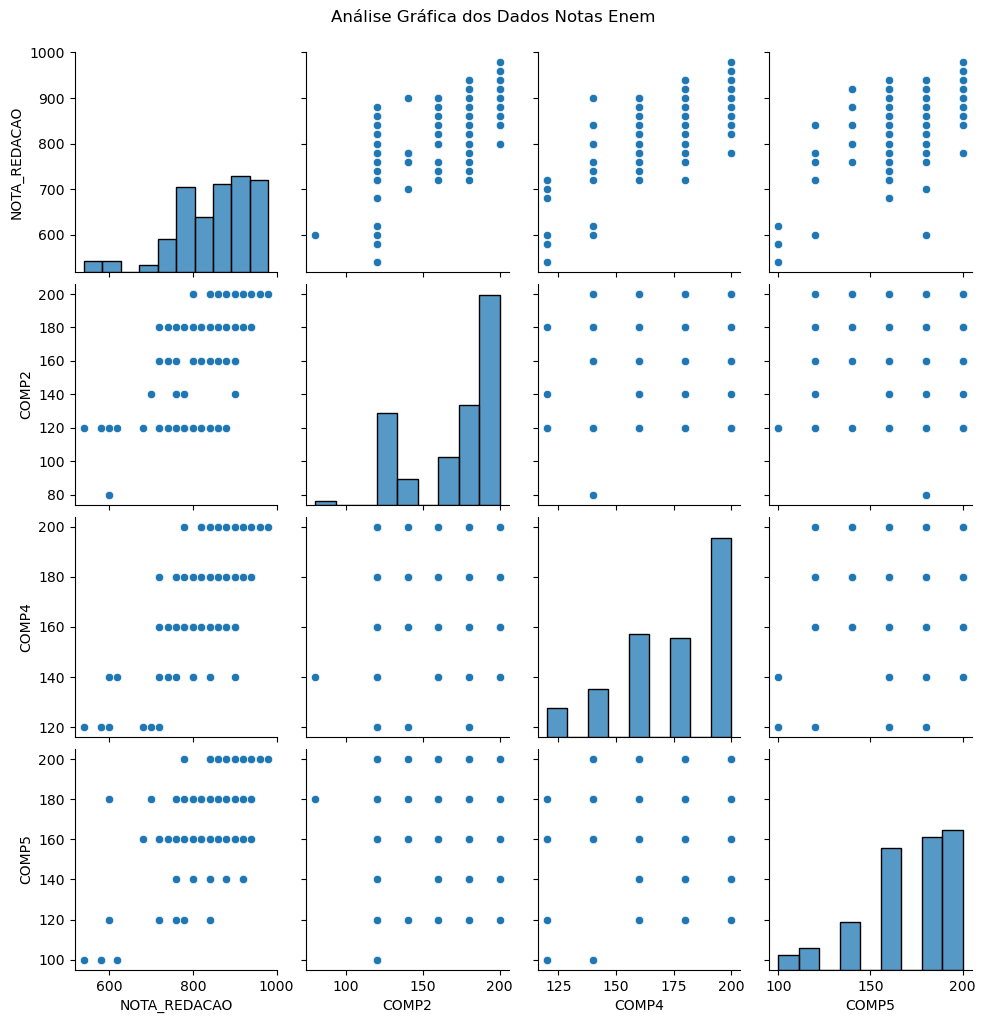

In [76]:
# Análise gráfica - Pairplot
import seaborn as sns
sns.pairplot(variaveis)
plt.suptitle("Análise Gráfica dos Dados Notas Enem", y=1.02)
plt.show()

In [15]:
variaveis.corr()

,NOTA_REDACAO,COMP2,COMP4,COMP5
NOTA_REDACAO,1.000000,0.725277,0.785098,0.675253
COMP2,0.725277,1.000000,0.375906,0.298434
COMP4,0.785098,0.375906,1.000000,0.428872
COMP5,0.675253,0.298434,0.428872,1.000000


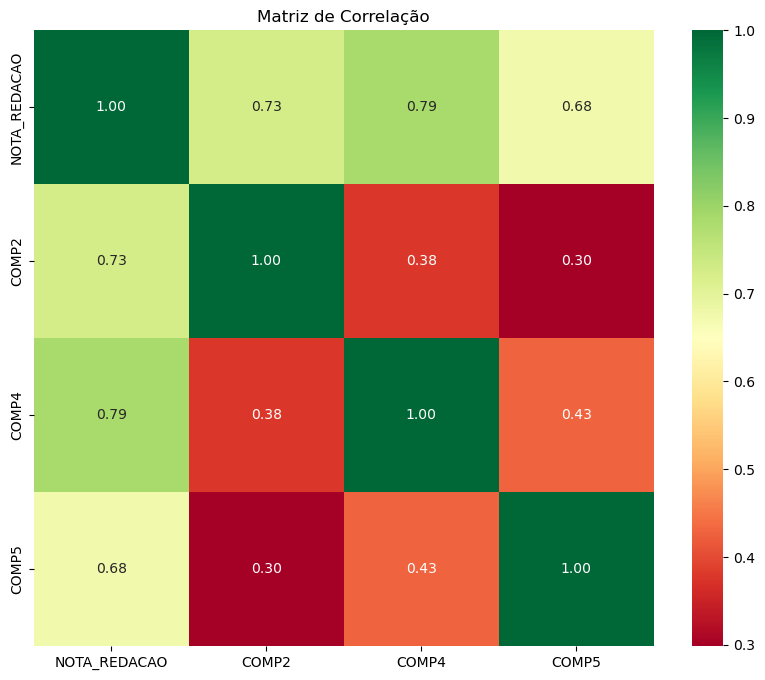

In [77]:
correlation_matrix = variaveis.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

Criando o Modelo 

In [ ]:
modelo = smf.ols('NOTA_REDACAO ~ COMP2 + COMP4 + COMP5', data = colegiox).fit()

Criando um vetor com os resíduos

In [17]:
residuos = modelo.resid
residuos

17        -4.498054
10760     33.309358
13315     -5.718021
20006    -26.432059
26697      1.349594
            ...    
426829    35.760528
428241   -17.683137
443242   -17.497499
462446   -56.783460
483420    34.529325
Length: 130, dtype: float64

### Verificando os pressupostos

### Teste de Normalidade dos resíduos

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [18]:
import scipy.stats as stats

In [19]:
estatistica, p = stats.shapiro(residuos)

In [22]:
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9847341775894165
p-valor: 0.15436169505119324


Resíduos possuem distribuição normal!

In [23]:
import matplotlib.pyplot as plt

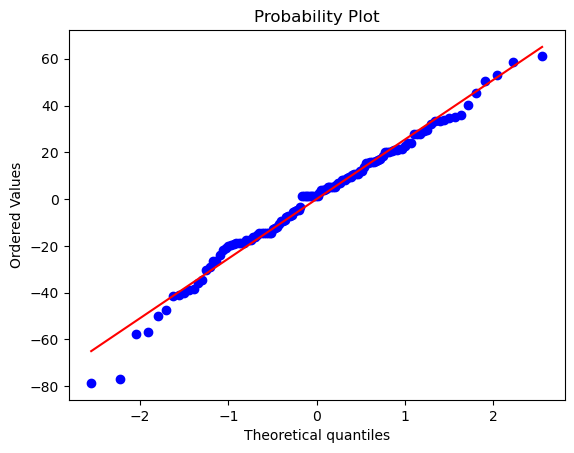

In [24]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.show()

### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

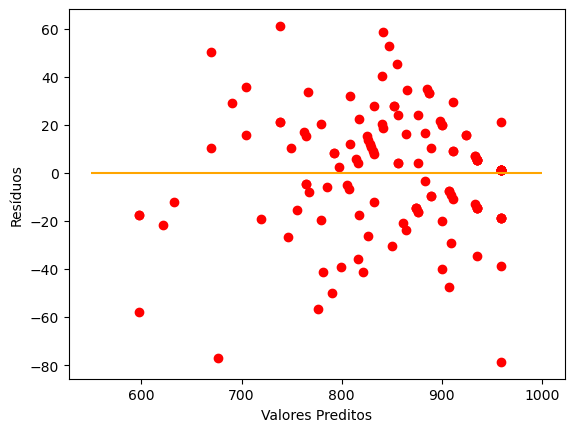

In [27]:
plt.scatter(y=residuos, x=modelo.predict(), color='red')
plt.hlines(y=0, xmin=550, xmax=1000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Aparentemente os residuos tem uma variação constante

**Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)**

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [28]:
from statsmodels.compat import lzip

In [29]:
estatistica, p, f, fp = sms.het_breuschpagan(modelo.resid, modelo.model.exog)

In [31]:
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 7.9398325686941575
p-valor: 0.047271689874475095


Pelo teste os resíduos não são homocedásticos - E agora?

**Outiliers nos resíduos**

(Entre -3 e 3)

In [35]:
outliers = modelo.outlier_test()

In [36]:
outliers.max()

student_resid    2.466219
unadj_p          0.957876
bonf(p)          1.000000
dtype: float64

In [37]:
outliers.min()

student_resid   -3.260297
unadj_p          0.001434
bonf(p)          0.186452
dtype: float64

### **Ausência de Multicolinearidade**

Somente entre as variáveis **independentes**.
Atenção a valores com r > 0,7
Considerada multicolinearidade quando r > 0.9.

In [38]:
variaveis = colegiox[['COMP2', 'COMP4', 'COMP5']]

In [39]:
correlacoes = variaveis.corr()

In [40]:
correlacoes

,COMP2,COMP4,COMP5
COMP2,1.000000,0.375906,0.298434
COMP4,0.375906,1.000000,0.428872
COMP5,0.298434,0.428872,1.000000


Usando Fator de Inflação de Variância (VIF)

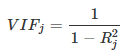

Esse valor deve ser menor que 5!

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [42]:
vif = add_constant(variaveis) # função espera a presença de uma constante na matriz de variáveis ​​explicativas
pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index=vif.columns)

const    72.466982
COMP2     1.196714
COMP4     1.335832
COMP5     1.259221
dtype: float64

In [43]:
vif

,const,COMP2,COMP4,COMP5
17,1.0,140.0,160.0,160.0
10760,1.0,200.0,200.0,140.0
13315,1.0,140.0,200.0,120.0
20006,1.0,180.0,180.0,140.0
26697,1.0,200.0,200.0,200.0
...,...,...,...,...
426829,1.0,120.0,140.0,160.0
428241,1.0,120.0,120.0,100.0
443242,1.0,200.0,160.0,140.0
462446,1.0,160.0,180.0,120.0


### **Análise do Modelo**

Análise do modelo

- Intercept e Coeficiente

- p_valor para cada coeficiente < 0,05 (estatisticamente significativos).

- Adjusted R-squared (explicação do modelo através dos dados).

- p_valor da estatística F < 0.05 (valida o modelo de regressão).

In [44]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           NOTA_REDACAO   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     507.2
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           3.97e-70
Time:                        18:51:01   Log-Likelihood:                -604.30
No. Observations:                 130   AIC:                             1217.
Df Residuals:                     126   BIC:                             1228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.1987     19.162      6.064      0.0


**Equação:** Nota Redação = 116,1987 + 1,2831.COMP2 + 1,7298.COMP4 + 1,1993.COMP5

In [46]:
# Criando uma coluna de previsão
colegiox['previsao'] = modelo.fittedvalues

C:\Users\anail\AppData\Local\Temp\ipykernel_20428\684249874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegiox['previsao'] = modelo.fittedvalues


In [47]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,previsao
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim,764.498054
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim,886.690642
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim,785.718021
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim,826.432059
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,958.650406


## **MODELO 2**

In [48]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [49]:
# Criação do modelo
modelo2 = smf.ols('NOTA_REDACAO ~ COMP2 + COMP4', data = colegiox).fit()

In [50]:
residuos2 = modelo2.resid
residuos2

17         -5.800864
10760     -19.726164
13315     -73.382235
20006     -67.154169
26697      20.273836
             ...    
426829     46.771131
428241    -69.438183
443242    -52.144793
462446   -118.372859
483420     47.855207
Length: 130, dtype: float64

### Teste de Normalidade dos resíduos

In [51]:
import scipy.stats as stats

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [52]:
estatistica, p = stats.shapiro(residuos2)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9847795367240906
p-valor: 0.15595780313014984


In [53]:
import matplotlib.pyplot as plt

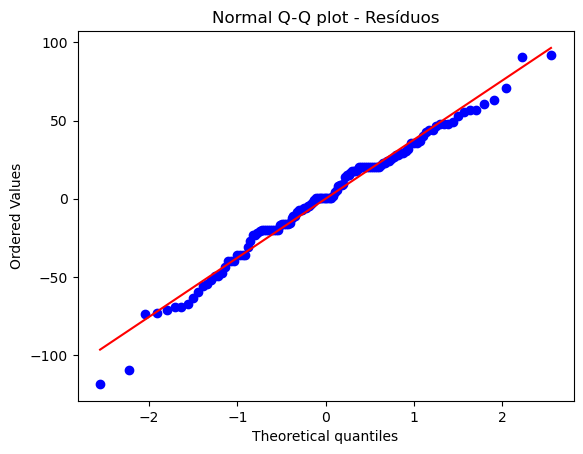

In [54]:
stats.probplot(residuos2, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

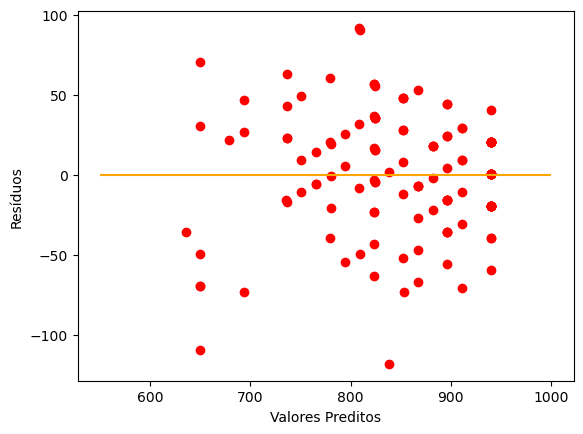

In [56]:
plt.scatter(y=residuos2, x=modelo2.predict(), color='red')
plt.hlines(y=0, xmin=550, xmax=1000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

**Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)**

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [57]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [58]:
estatistica, p, f, fp = sms.het_breuschpagan (modelo2.resid, modelo2.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 15.042745745701554
p-valor: 0.0005413887974309888
f-valor: 8.309300366021327
f_p-valor: 0.00040612282224008583


**Outiliers nos resíduos**

(Entre -3 e 3)

In [64]:
outliers = modelo2.outlier_test()

In [65]:
outliers.max()

student_resid    2.521846
unadj_p          0.994221
bonf(p)          1.000000
dtype: float64

In [66]:
outliers.min()

student_resid   -3.254277
unadj_p          0.001460
bonf(p)          0.189769
dtype: float64

### **Ausência de Multicolinearidade**

Somente entre as variáveis independentes.

Considerada multicolinearidade quando r > 0.9.

In [59]:
variaveis2 = colegiox[['COMP2','COMP4']]

In [60]:
variaveis2.head()

,COMP2,COMP4
17,140.0,160.0
10760,200.0,200.0
13315,140.0,200.0
20006,180.0,180.0
26697,200.0,200.0


In [61]:
correlacoes = variaveis2.corr(method='pearson')
correlacoes

,COMP2,COMP4
COMP2,1.000000,0.375906
COMP4,0.375906,1.000000


Usando Fator de Inflação de Variância (VIF)

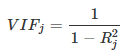

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [63]:
vif = add_constant(variaveis2) # função espera a presença de uma constante na matriz de variáveis ​​explicativas
pd.Series([variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])], index=vif.columns)

const    59.966319
COMP2     1.164559
COMP4     1.164559
dtype: float64

### **Análise do Modelo**

Análise do modelo

- Intercept

- p_valor para cada coeficiente < 0,05 (estatisticamente significativos).

- Adjusted R-squared (explicação do modelo através dos dados).

- p_valor da estatística F < 0.05 (valida o modelo de regressão).

In [67]:
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:           NOTA_REDACAO   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     314.2
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           6.76e-50
Time:                        18:58:50   Log-Likelihood:                -655.51
No. Observations:                 130   AIC:                             1317.
Df Residuals:                     127   BIC:                             1326.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    214.0062     25.745      8.313      0.0

**Equação:** Nota Redação = 214,0062 + 1,4391.COMP2 + 2,1895.COMP4

In [68]:
# Criando uma coluna com previsão
colegiox['previsao2'] = modelo2.fittedvalues

C:\Users\anail\AppData\Local\Temp\ipykernel_20428\3604984769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegiox['previsao2'] = modelo2.fittedvalues


In [69]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,previsao,previsao2
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim,764.498054,765.800864
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim,886.690642,939.726164
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim,785.718021,853.382235
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim,826.432059,867.154169
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,958.650406,939.726164


***Exercício 1***

Realize a análise para escola 35005368